# Simulation of a positron-induced Muon Source (part 1)


### Authors:
* Saverio Monaco
* Marianna Zeragic De Giorgio
* Gerardo Javier Carmona
* Hilario Capettini 

### Description

The production of a high brillance muon beam is one of the most important challenge for the future of Particle Physics. A particularly interesting idea consists of shooting high energy positrons on a target, aiming at the production of muons by means of the process $e^+ + e^- \rightarrow \mu^+ + \mu^-$. To mimize the divergence of the resulting "muon beam", the positrons energy is chosen so that the reaction occurs close to threshold (assuming the electrons in the target to be at rest). The main goal of this project is to produce a Monte Carlo simulation of such a process. 


### References

* [LEMMA](https://arxiv.org/pdf/1509.04454.pdf) paper. The original paper describing the positron-induced low emittance muon source, ehere all the relevant kinematic features of the process have been studied
* [Babayaga](https://www2.pv.infn.it/~hepcomplex/babayaga.html) event generator. You may want to install and run it as a comparison for your results.
* [2018 Experiment](https://arxiv.org/pdf/1909.13716.pdf): the paper describing the (very poor..) results of the experiment carried out in summer 2018
* [2021 proposal](https://cds.cern.ch/record/2712394?ln=en): the proposal for the experiment in 2021


### Contact

* Marco Zanetti <marco.zanetti@unipd.it>
* Camilla Curatolo <camilla.curatolo@pd.infn.it>
* Jacopo Pazzini <jacopo.pazzini@unipd.it>
* Alberto Zucchetta <alberto.zucchetta@pd.infn.it>

## Analytical part

1. Compute the process leading-order cross section, $\sigma(\theta; \sqrt{s})$, as a function of the scattering angle $\theta$ and with the  center of mass energy $\sqrt{s}$ as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s}\gg m_\mu$, which is clearly not the case here ($\sqrt{s}\sim 2m_\mu$);

2. Compute and display the angle and momentum components distributions of the emerging muon pairs;

3. Boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process;

In [ ]:
#ADD THEORETICAL RESULTS

In [1]:
#Import the required packages

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.integrate as integrate
import csv
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import math

In [2]:
#Define the universal constants

muon_mass       = 0.1056583745       #[GeV]
electron_mass   = 0.00051099894      #[GeV]
alpha           = 0.007297           #[]            #CHECK
Avogadro_number = 6.02214076e23      #[#/mol]

The differential cross section we chose is $$\left(\frac{d\sigma}{d\Omega}\right)_{CM}=\frac{\alpha^2}{16\, s^2}\frac{|p'|}{\sqrt{s}}\left(s+p'^2\cos^2\vartheta+m_\mu^2\right)$$

The total relativistic energy is $$E_{CM}^2=4p'^2+4m_\mu^2\rightarrow p'^2=\frac{E_{CM}^2}{4}-m_\mu^2\rightarrow p'^2=\frac{s}{4}-m_\mu^2$$

Then our differential cross section becomes
$$\left(\frac{d\sigma}{d\Omega}\right)_{CM}=\frac{\alpha^2}{16\, s}\sqrt{\frac{1}{4}-\frac{m_\mu^2}{s}}\left[\left(1+\frac{m_\mu^2}{s}\right)+\left(\frac{1}{4}- \frac{m_\mu^2}{s}\right)\cos^2{\theta}\right]$$

Integrating over the solid angle we obtain the total cross section
$$\sigma(s)=\frac{\pi \alpha^2}{4\, s}\sqrt{\frac{1}{4}-\frac{m_\mu^2}{s}}\left[\frac{13}{12}+\frac{2}{3}\frac{m_\mu^2}{s}\right]$$

The PDF for a given energy s is given by
$$PDF(\theta)=  \int_{0}^{2 \pi} \sin(\theta)\frac{d\sigma}{d\Omega} d\phi $$

In [3]:
#rs is the sqrt(s) = E
#The units are Barn so 1ub = 2.56819e-3  GeV^-2

gev_to_ub = 389.379

def cros_section(rs):
    y = np.pi * alpha**2 / (4*rs**2) * np.sqrt(1/4 - muon_mass**2 / rs**2) * (13/12 + 2/3 * muon_mass**2 / rs**2)
    return y * gev_to_ub
    
def dif_cross_section(rs,theta):
    y = alpha**2/(16 * rs**2)* np.sqrt(1/4 - muon_mass**2/rs**2) * (1 + muon_mass**2 / rs**2 + (1/4 -muon_mass**2/rs**2)*np.cos(theta)**2)
    return y * gev_to_ub

def pdf_theta(rs,theta):
    y = 2*np.pi *np.sin(theta)*dif_cross_section(rs,theta)
    return y
    
def pdf_theta_normalized(rs,theta):
    y =pdf_theta(rs,theta)/cros_section(rs)
    return y

def pdf_p(rs,theta):
    y = 0
    return y
    
def pdf_p_normalized(rs,theta):
    y =pdf_p(rs,theta)/cros_section(rs)
    return y

In [4]:
#
###
####
#####
######
####### Analysis
######
#####
###
##
#

In [5]:
##################################################################################
#Analysis parameters

delta = 0.001
E = 2 * muon_mass + delta #This is the proposed energy just above the threshold
N = 10**7
deg=180/math.pi #Conversion radiants to degrees

##################################################################################

In [6]:
print("Momentum in the CM", '%.5f' % np.sqrt(E**2/4-muon_mass**2), "GeV")
print("Total relativistic energy in the CM", '%.5f' % E, "GeV")
print("Cross section", '%.5f' % cros_section(E), "microbarn")

Momentum in the CM 0.01029 GeV
Total relativistic energy in the CM 0.21232 GeV
Cross section 0.02186 microbarn


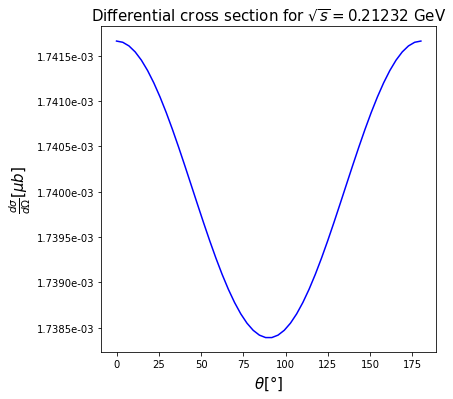

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
theta = np.linspace(0,np.pi)
ax.plot(theta*deg, dif_cross_section(E,theta), color='blue', label='PDF')

plt.title(r'Differential cross section for $\sqrt{s}=$'+str('%.5f' % E)+str(" GeV"), fontsize=15)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4e'))
plt.xlabel(r'$ \theta [°] $', fontsize=15)
plt.ylabel(r'$ \frac{d\sigma}{d\Omega} [\mu b]$', fontsize=15)
plt.show()

<ipython-input-3-e1704cbd4a0d>:7: RuntimeWarning: invalid value encountered in sqrt
  y = np.pi * alpha**2 / (4*rs**2) * np.sqrt(1/4 - muon_mass**2 / rs**2) * (13/12 + 2/3 * muon_mass**2 / rs**2)
<ipython-input-3-e1704cbd4a0d>:7: RuntimeWarning: invalid value encountered in sqrt
  y = np.pi * alpha**2 / (4*rs**2) * np.sqrt(1/4 - muon_mass**2 / rs**2) * (13/12 + 2/3 * muon_mass**2 / rs**2)


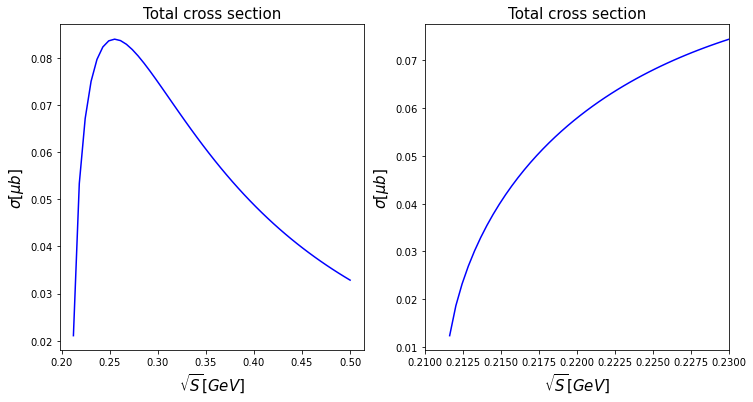

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
rs = np.linspace(0.2, 0.5)
ax1.plot(rs, cros_section(rs), color='blue', label='PDF')

ax1.set_title('Total cross section', fontsize=15)
ax1.set_xlabel(r'$ \sqrt{S} [GeV]$', fontsize=15)
ax1.set_ylabel(r'$ \sigma [\mu b]$', fontsize=15)

rs = np.linspace(0.21, 0.23)
ax2.plot(rs, cros_section(rs), color='blue', label='PDF')

ax2.set_title('Total cross section', fontsize=15)
ax2.set_xlabel(r'$ \sqrt{S} [GeV]$', fontsize=15)
ax2.set_ylabel(r'$ \sigma [\mu b]$', fontsize=15)
ax2.set_xlim(0.21,0.23)
plt.show()

Angular distribution


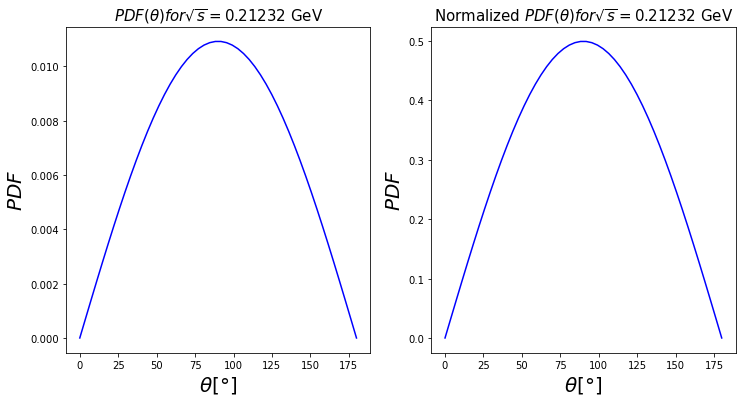

Check the normalization
Integral of the PDF in [0,pi] 0.02186
Integral of the normalized PDF in [0,pi] 1.00000


In [9]:
print('Angular distribution')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

theta = np.linspace(0, np.pi)


ax1.plot(theta*deg, pdf_theta(E,theta),color='blue', label='PDF')
ax1.set_title(r'$ PDF(\theta) for \sqrt{s}=$'+str('%.5f' % E)+str(" GeV"), fontsize=15)
ax1.set_xlabel(r'$ \theta [°] $', fontsize=20)
ax1.set_ylabel(r'$ PDF$', fontsize=20)


ax2.plot(theta*deg, pdf_theta_normalized(E,theta),color='blue', label='PDF')
ax2.set_title(r'Normalized $ PDF(\theta) for \sqrt{s}=$'+str('%.5f' % E)+str(" GeV"), fontsize=15)
ax2.set_xlabel(r'$ \theta [°] $', fontsize=20)
ax2.set_ylabel(r'$ PDF$', fontsize=20)
plt.show()

print('Check the normalization')
x2 = lambda x: pdf_theta(E,x)
print('Integral of the PDF in [0,pi]', "{:.5f}".format(integrate.quad(x2, 0., np.pi)[0]))
x2 = lambda x: pdf_theta_normalized(E,x)
print('Integral of the normalized PDF in [0,pi]', "{:.5f}".format(integrate.quad(x2, 0., np.pi)[0]))

## Monte Carlo Simulation

4. Write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically; 
5. Produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);


In [10]:
#
###
####
#####
######
#######
######
#####
###
##
#

In [11]:
#Inputs

box = [0, np.pi, 0.0 ,0.5] #Box coordinates [x0, x1, y0, y1] for analysis
                           #We choose the size to optimize the amount of useful particles

In [12]:
def accept_reject(N,pdf,box,cm_energy):
    x = np.random.uniform(box[0], box[1], N)
    y = np.random.uniform(box[2], box[3], N)
    
    accepted = x[y<=pdf(cm_energy,x)]
    return accepted  

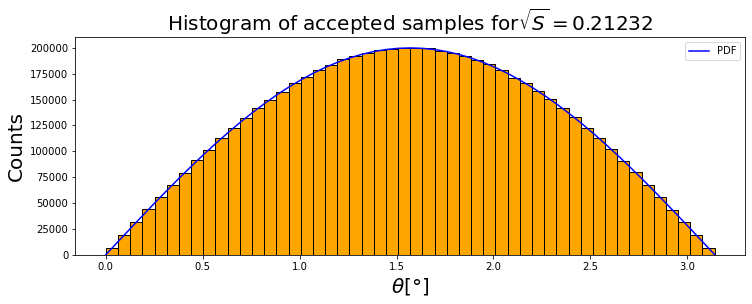

In [13]:
#Plot scaled histogram

fig, ax = plt.subplots(figsize=(12,4))

n, bins, _ = ax.hist(accept_reject(N,pdf_theta_normalized,box,E), bins=50,color='orange', ec='black')

d = (bins[1]-bins[0])
scaling = d * n.sum()
ax.plot(bins, pdf_theta_normalized(E,bins)*scaling, color='blue', label='PDF')

plt.title('Histogram of accepted samples for'r'$ \sqrt{S}=$'+str('%.5f' % E), fontsize=20)
plt.xlabel(r'$ \theta [°]$', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.legend()
plt.show()

In [14]:
#
###
####
#####
######
####### SIMULATION 1
######
#####
###
##
#

In [15]:
##################################################################################
#Simulation parameters

delta = 0.001
E = 2 * muon_mass + delta  #This is the proposed energy just above the threshold
N = 10**7

###################################################################################

In [16]:
#Obtain the parameters distribution

theta_instances = accept_reject(N,pdf_theta_normalized,box,E)
N_instances     = len(theta_instances)
phi_instances   = np.random.uniform(0., 2*np.pi, N_instances)

p = np.sqrt(E**2/4-muon_mass**2)

In [17]:
#Obtain the muons momenta and build the file  (Is it in the CoM frame?)

pxm = p * np.sin(theta_instances)*np.cos(phi_instances)
pym = p * np.sin(theta_instances)*np.sin(phi_instances)
pzm = p * np.cos(theta_instances)

pxam = -pxm
pyam = -pym
pzam = -pzm

#df = pd.DataFrame({'Theta' : theta_instances,'Phi' : phi_instances,'Muon px' : pxm, 'Muon py' : pym, 'Muon pz' : pzm})
#df.to_csv('/home/usuario/PoD/muons_momentum_com.csv', index=False)

In [18]:
#Check the file

print(r'$\sqrt(s)$',E)
print('')
print('Norm of p =',p)
file_name='/home/usuario/PoD/muons_momentum_com.csv'
data=pd.read_csv(file_name)
data

$\sqrt(s)$ 0.212316749

Norm of p = 0.010291179451355442


FileNotFoundError: [Errno 2] No such file or directory: '/home/usuario/PoD/muons_momentum_com.csv'

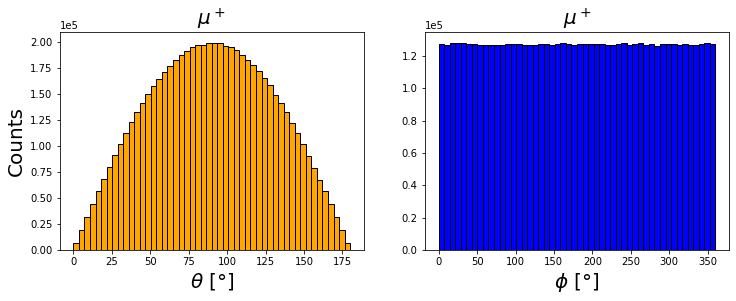

In [19]:
#Angular distribution (Insert some diagram with polar coordinates and the beam)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

n, bins, _ = ax1.hist(theta_instances*deg, bins=50,color='orange', ec='black')
ax1.set_title(r'$\mu^+$', fontsize=20)
ax1.set_xlabel(r'$\theta$ [°]', fontsize=20)
ax1.set_ylabel('Counts', fontsize=20)
ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

n, bins, _ = ax2.hist(phi_instances*deg, bins=50,color='blue', ec='black')
ax2.set_title(r'$\mu^+$', fontsize=20)
ax2.set_xlabel(r'$\phi$ [°]', fontsize=20)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

plt.show()

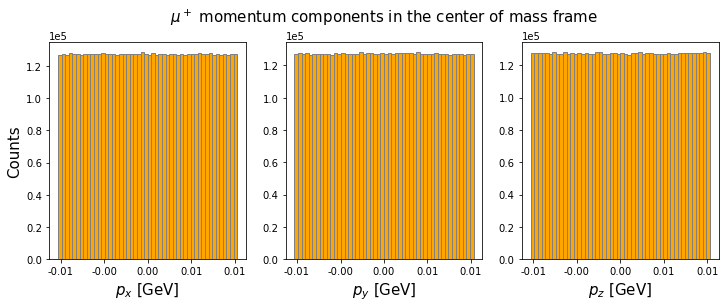

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

n, bins, _ = ax1.hist(pxm, bins=50,color='orange', ec='grey')
ax1.set_xlabel(r'$p_x$ [GeV]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax2.hist(pym, bins=50,color='orange', ec='grey')
ax2.set_title(r'$\mu^+$ momentum components in the center of mass frame', fontsize=15, pad=20)
ax2.set_xlabel(r'$p_y$ [GeV]', fontsize=15)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))



n, bins, _ = ax3.hist(pzm, bins=50,color='orange', ec='grey')
ax3.set_xlabel(r'$p_z$ [GeV]', fontsize=15)
ax3.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))



plt.show()

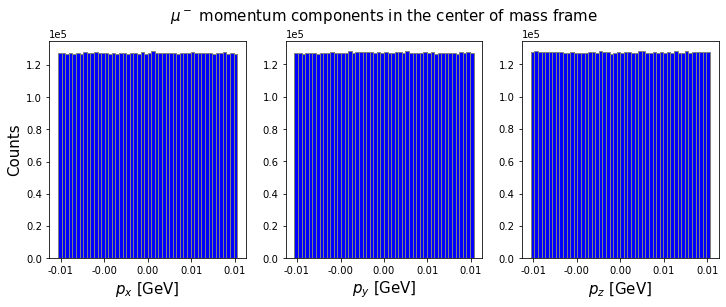

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

n, bins, _ = ax1.hist(pxam, bins=50,color='b', ec='grey')
ax1.set_xlabel(r'$p_x$ [GeV]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

n, bins, _ = ax2.hist(pyam, bins=50,color='blue', ec='grey')
ax2.set_title(r'$\mu^-$ momentum components in the center of mass frame', fontsize=15, pad=20)
ax2.set_xlabel(r'$p_y$ [GeV]', fontsize=15)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax3.hist(pzam, bins=50,color='blue', ec='grey')
ax3.set_xlabel(r'$p_z$ [GeV]', fontsize=15)
ax3.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


plt.show()

In [ ]:
#Inser Pandas table with some statistics




In [ ]:
#THEORY, what Saverio wrote but in the other frame with the electron moving toward the CM wit V=Vz








In [22]:
#Boost the results to the laboratory frame

vz = -np.sqrt(1-4*electron_mass**2/E**2)   
gamma = 1/np.sqrt(1-vz**2)

In [23]:
print('Gamma', '%.5f' % gamma)
print('Speed along z axis (vz)', '%.5f' % vz)

Gamma 207.74676
Speed along z axis (vz) -0.99999


In [24]:
pxm_lb = pxm
pym_lb = pym
pzm_lb = gamma * pzm - vz * gamma *E 

pxam_lb = pxam 
pyam_lb = pyam
pzam_lb = gamma * pzam - vz * gamma *E

#df = pd.DataFrame({'Theta' : theta_instances,'Phi' : phi_instances,'Muon px' : pxm_lb, 'Muon py' : pym_lb, 'Muon pz' : pzm_lb})
#df.to_csv('/home/usuario/PoD/muons_momentum_lab.csv', index=False)

In [25]:
#Check the file

print('sqrt(s):', '%.5f' % E, "GeV")
print('')
print('Norm of p:', '%.5f' % p)
file_name='/home/usuario/PoD/muons_momentum_lab.csv'
data=pd.read_csv(file_name)
data

sqrt(s): 0.21232 GeV

Norm of p: 0.01029


FileNotFoundError: [Errno 2] No such file or directory: '/home/usuario/PoD/muons_momentum_lab.csv'

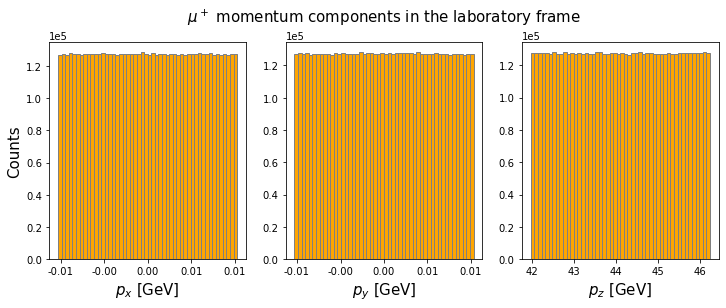

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

n, bins, _ = ax1.hist(pxm_lb, bins=50,color='orange', ec='grey')
ax1.set_xlabel(r'$p_x$ [GeV]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax2.hist(pym_lb, bins=50,color='orange', ec='grey')
ax2.set_title(r'$\mu^+$ momentum components in the laboratory frame', fontsize=15, pad=20)
ax2.set_xlabel(r'$p_y$ [GeV]', fontsize=15)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax3.hist(pzm_lb, bins=50,color='orange', ec='grey')
ax3.set_xlabel(r'$p_z$ [GeV]', fontsize=15)
ax3.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

#ax3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.show()

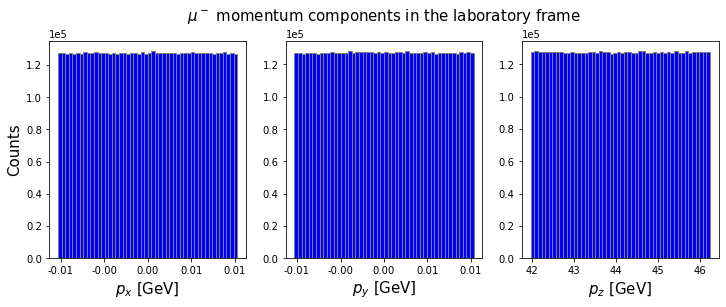

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

n, bins, _ = ax1.hist(pxam_lb, bins=50,color='blue', ec='grey')
ax1.set_xlabel(r'$p_x$ [GeV]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax2.hist(pyam_lb, bins=50,color='blue', ec='grey')
ax2.set_title(r'$\mu^-$ momentum components in the laboratory frame', fontsize=15, pad=20)
ax2.set_xlabel(r'$p_y$ [GeV]', fontsize=15)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax3.hist(pzam_lb, bins=50,color='blue', ec='grey')
ax3.set_xlabel(r'$p_z$ [GeV]', fontsize=15)
ax3.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


plt.show()

In [ ]:
#Inser Pandas table with some statistics






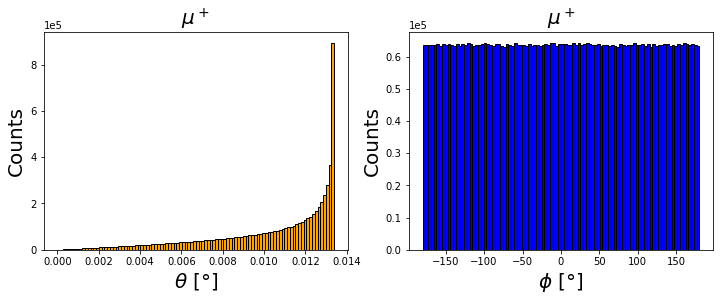

In [28]:
#Reconstruction of the angular distribution from the momenta
#It means that the beam is concentrated in an arc of 0.04°

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

theta_lb = np.arccos(pzm_lb/np.sqrt(pxm_lb**2+pym_lb**2+pzm_lb**2))

n, bins, _ = ax1.hist(theta_lb*deg, bins=100,color='orange', ec='black')
ax1.set_title(r'$\mu^+$', fontsize=20)
ax1.set_xlabel(r'$\theta$ [°]', fontsize=20)
ax1.set_ylabel('Counts', fontsize=20)
ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))


phi_lb = np.arctan2(pym_lb,pxm_lb)

n, bins, _ = ax2.hist(phi_lb*deg, bins=100,color='blue', ec='black')
ax2.set_title(r'$\mu^+$', fontsize=20)
ax2.set_xlabel(r'$\phi$ [°]', fontsize=20)
ax2.set_ylabel('Counts', fontsize=20)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

plt.show()

In [29]:
p_cm = -E**2 + pxm**2+pym**2+pzm**2
print('Squared four momentum in the CM frame',p_cm)

E_lb = gamma*(E-pzm*vz)
p_lb = -E_lb**2 + pxm_lb**2+pym_lb**2+pzm_lb**2
print('Squared four momentum in the LB frame', p_lb)

print('Muon energy in the LB frame',E_lb)

Squared four momentum in the CM frame [-0.04497249 -0.04497249 -0.04497249 ... -0.04497249 -0.04497249
 -0.04497249]
Squared four momentum in the LB frame [-0.04497249 -0.04497249 -0.04497249 ... -0.04497249 -0.04497249
 -0.04497249]
Muon energy in the LB frame [44.14547278 44.70547648 45.3960338  ... 46.17218653 46.18957496
 43.82927944]


In [ ]:
#Insert 3d plot of a sphere with a heatmam

In [ ]:
#
###
####
#####
######
#######
######
#####
###
##
#

## Properties of the target 
6. Assume a $3$ cm thick Beryllium block is used as target and a rate of positron on target of $10^6$ Hz. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations;


In [ ]:
#Write some theory, basically we use the theory of poitn 3 LEMMA paper (Antonelli)





In [30]:
#Realistic target

positron_frequency = 1.e6                    #[Hz]
target_length      = 3                       #[cm]
Beryllium_aw       = 9.0121831               #[g/mol]
Beryllium_e        = 4
X0                 = 35.2                    #[cm] Beryllium radiation lengt
cs                 = cros_section(E)*10.e-31 #[uBarn]-->[cm^2]
time               = 60 * 60 *24 *7          #[secconds]

In [31]:
#Electron density in the target
Beryllium_density = Avogadro_number / Beryllium_aw
electron_density  = Beryllium_e * Beryllium_density

#Number of positrons 
N_positrons = positron_frequency * time 

#Number of muons
N_muons = N_positrons * electron_density * cs * target_length

rf = N_muons/N

print('Number of positrons in a week                     '"{:.2e}".format( N_positrons))
print('')
print('Number of muons produced in a week with this beam '"{:.2e}".format( N_muons))
print('')
print('Number of events simulated                        '"{:.2e}".format( N))
print('')
print('Number of muons produced                          '"{:.2e}".format( np.sum(n)))
print('')
print('Rescaling factor', rf)
print('')
print('Real number of muons produced after a week        '"{:.2e}".format( rf*np.sum(n)))

Number of positrons in a week                     6.05e+11

Number of muons produced in a week with this beam 1.06e+04

Number of events simulated                        1.00e+07

Number of muons produced                          6.37e+06

Rescaling factor 0.0010600903882547078

Real number of muons produced after a week        6.75e+03


In [ ]:
#
###
####
#####
######
####### 
######
#####
###
##
#

## Properties of  the beam
7. Repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1$ cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5$ GeV;

In [32]:
##################################################################################
#Simulation parameters

N = 10**7  #Number of positrons
E_lab = 45  #GeV
sigma = 0.5 #Mean and standard deviation

###################################################################################

In [33]:
#Realistic beam
#Up to this point we have been assuming that the energy of the incident 
#beam had a constant value, now we want to make a model where the energy
#of the beam has a gaussian distribution

E_lab_instances = np.random.normal(E_lab, sigma, N)


#Now we need to boost them to the CM frame

vz    = np.sqrt((E_lab-electron_mass)/(E_lab+electron_mass))   
gamma = 1/np.sqrt(1-vz**2)

E_cm_instances = 2 *gamma*(E_lab_instances-vz*np.sqrt(E_lab_instances**2-electron_mass**2))

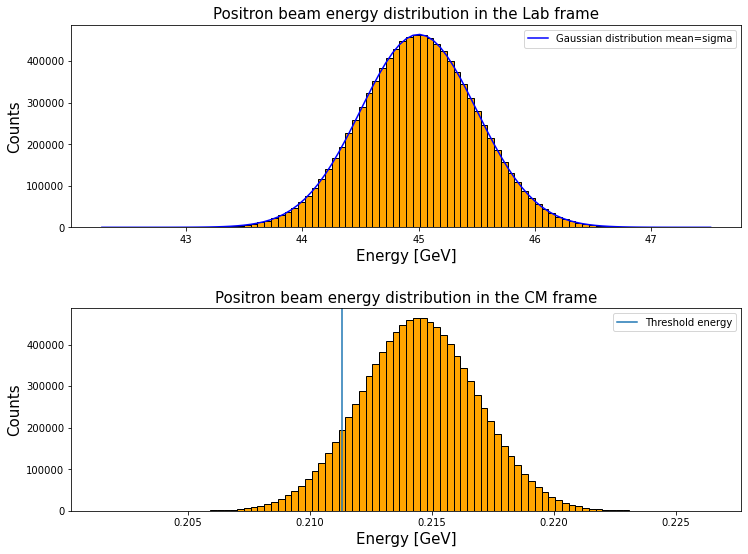

In [34]:
# Plot scaled histogram

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

n, bins, _ = ax1.hist(E_lab_instances, bins=90,color='orange', ec='black')

d = (bins[1]-bins[0])
scaling = d * n.sum()

ax1.plot(bins, scaling/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - E_lab)**2 / (2 * sigma**2) ),color='blue', label='Gaussian distribution mean=sigma')

ax1.set_title('Positron beam energy distribution in the Lab frame', fontsize=15)
ax1.set_xlabel('Energy [GeV]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
ax1.legend()

n, bins, _ = ax2.hist(E_cm_instances, bins=90,color='orange', ec='black')

d = (bins[1]-bins[0])
scaling = d * n.sum()

ax2.axvline(x=2*muon_mass, label='Threshold energy')
#ax2.plot(bins, scaling/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - E_lab)**2 / (2 * sigma**2) ),color='blue', label='PDF')
ax2.set_title('Positron beam energy distribution in the CM frame', fontsize=15)
ax2.set_xlabel('Energy [GeV]', fontsize=15)
ax2.set_ylabel('Counts', fontsize=15)
ax2.legend()

plt.subplots_adjust(top=0.8, wspace=0.4, hspace=0.4)

plt.show()

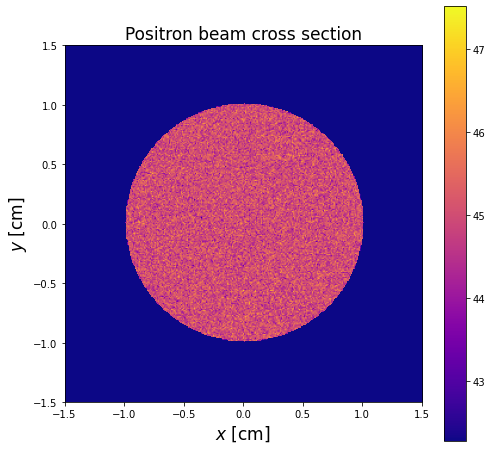

In [35]:
#Once we have the energy distribution, we plot a heatmap of the beam

def circular_section(data):
    
    #Specify circle parameters: centre ij and radius
    pixels =len(data[0,:])
    ci,cj = pixels/2 , pixels/2
    cr=pixels/3

    #Create index arrays to z
    I,J=np.meshgrid(np.arange(data.shape[0]),np.arange(data.shape[1]))

    #Calculate distance of all points to centre
    dist=np.sqrt((I-ci)**2+(J-cj)**2)

    #Assign value of 1 to those points where dist<cr:
    data[np.where(dist>cr)]=0
    return data



pixels=300
size  =(-1.5,1.5,-1.5,1.5)

#We randomly pick (pixel x pixel) elements of the energy distribution to plot the beam cross section

z = np.random.choice(E_lab_instances, size=(pixels,pixels), replace=True, p=None) 

plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(circular_section(z),cmap='plasma', extent=(size),origin='lower')
plt.title('Positron beam cross section',fontsize=17)
plt.ylabel(r'${y}$ [cm]',fontsize=17)  
plt.xlabel(r'${x}$ [cm]',fontsize=17)
plt.colorbar()
plt.clim(np.min(E_lab_instances),np.max(E_lab_instances))
plt.show()

In [ ]:
#
###
####
#####
######
####### SIMULATION 2
######
#####
###
##
#

In [36]:
##################################################################################
#Simulation parameters

N     = 10**5 #Number of positrons 
E_lab = 45    #GeV
sigma = 0.5   # mean and standard deviation

###################################################################################

In [37]:
#Now that we have the energy distributions and also an idea of the shape
#we can repeat the previous part

#Obtain the positron energy samples in the laboratory frame
E_lab_samples = np.random.normal(E_lab, sigma, N)

#Boost of the positrons energy to the Center of Mass Frame
vz    = np.sqrt((E_lab-electron_mass)/(E_lab+electron_mass))   
gamma = 1/np.sqrt(1-vz**2)

E_cm_samples = 2 *gamma*(E_lab_samples-vz*np.sqrt(E_lab_samples**2-electron_mass**2))

#Filter the values below the threshold
E_cm_samples = E_cm_samples[E_cm_samples> 2* muon_mass]

N_instances = len(E_cm_samples)

#######################
#EXTREMELY INEFICIENT METHOD TO GET THETA takes around 25 minutes for 10**5 positrons


In [38]:
#Calculate the total momentum p in CM
#Calculate the momentum components in CM

p_cm_instances = np.sqrt(E_cm_samples**2/4-muon_mass**2)

pxm_cm = p_cm_instances * np.sin(theta_cm_instances)*np.cos(phi_cm_instances)
pym_cm = p_cm_instances * np.sin(theta_cm_instances)*np.sin(phi_cm_instances)
pzm_cm = p_cm_instances * np.cos(theta_cm_instances)


#Calculate the momentum components in Lab

vz = -np.sqrt(1-4*electron_mass**2/E_cm_samples**2)   
gamma = 1/np.sqrt(1-vz**2)

pxm_lb = pxm_cm
pym_lb = pym_cm
pzm_lb = gamma * pzm_cm - vz * gamma *E_cm_samples 


#Calculate the total momentum p in Lab
#Obtain the angles theta and phi in Lab

p_lb_instances = np.sqrt(pxm_lb**2 + pym_lb**2 + pzm_lb**2)

theta_lb_instances = np.arccos(pzm_lb/p_lb_instances)
phi_lb_instances   = np.arctan2(pym_lb,pxm_lb)

NameError: name 'theta_cm_instances' is not defined

In [ ]:
#Plot of the spherical angle distribution in each frame

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

n, bins, _ = ax1.hist(theta_cm_instances*deg, bins=50,color='orange', ec='black')
ax1.set_title(r'$\mu^+$', fontsize=15)
ax1.set_xlabel(r'$\theta$ [°]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
#ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

n, bins, _ = ax2.hist(phi_cm_instances*deg, bins=50,color='blue', ec='black')
ax2.set_title(r'$\mu^+$', fontsize=15)
ax2.set_xlabel(r'$\phi$ [°]', fontsize=15)
#ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

n, bins, _ = ax3.hist(theta_lb_instances*deg, bins=50,color='orange', ec='black')
ax3.set_title(r'$\mu^+$', fontsize=15)
ax3.set_xlabel(r'$\theta$ [°]', fontsize=15)
ax3.set_ylabel('Counts', fontsize=15)
#ax3.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

n, bins, _ = ax4.hist(phi_lb_instances*deg, bins=50,color='blue', ec='black')
ax4.set_title(r'$\mu^+$', fontsize=15)
ax4.set_xlabel(r'$\phi$ [°]', fontsize=15)
#ax4.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

plt.show()

In [ ]:
#Momentum distribution in the Lab frame

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

n, bins, _ = ax1.hist(pxm_cm, bins=50,color='orange', ec='grey')
ax1.set_xlabel(r'$p_x$ [GeV]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
#ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax2.hist(pym_cm, bins=50,color='orange', ec='grey')
ax2.set_title(r'$\mu^+$ momentum components in the CM frame', fontsize=15)
ax2.set_xlabel(r'$p_y$ [GeV]', fontsize=15)
#ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax3.hist(pzm_cm, bins=50,color='orange', ec='grey')
ax3.set_xlabel(r'$p_z$ [GeV]', fontsize=15)
#ax3.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
#ax3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


n, bins, _ = ax4.hist(pxm_lb, bins=50,color='dodgerblue', ec='grey')
ax4.set_xlabel(r'$p_x$ [GeV]', fontsize=15)
ax4.set_ylabel('Counts', fontsize=15)
#ax4.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax4.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax5.hist(pym_lb, bins=50,color='dodgerblue', ec='grey')
ax5.set_title(r'$\mu^+$ momentum components in the LAB frame', fontsize=15)
ax5.set_xlabel(r'$p_y$ [GeV]', fontsize=15)
#ax5.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax5.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))



n, bins, _ = ax6.hist(pzm_lb, bins=50,color='dodgerblue', ec='grey')
ax6.set_xlabel(r'$p_z$ [GeV]', fontsize=15)
#ax6.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
#ax3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


plt.show()

In [ ]:
#I would like to plot a sphere with a heatmap showing the muons distribution

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# as plot_surface needs 2D arrays as input
x = pxm_lb
y = pym_lb
# we make a meshgrid from the x,y data
X, Y = np.meshgrid(x, y)
#Z = np.sin(np.sqrt(X**2 + Y**2))
z = pzm_lb

# data_value shall be represented by color
data_value = np.random.rand(len(y), len(x))
# map the data to rgba values from a colormap
colors = cm.ScalarMappable(cmap = "viridis").to_rgba(data_value)


# plot_surface with points X,Y,Z and data_value as colors
surf = ax.plot_surface(X, Y, z, rstride=1, cstride=1, facecolors=colors,
                       linewidth=0, antialiased=True)

plt.show()

## Aditional considerations

8. Given that the electrons traversing the target lose energy as $E(z)=E_0 \exp{-z/X_0}$ (with z the longitudinal coordinate of the target, the one parallel to the beam direction and $X_0$ is the Beryllium radiation length), compute the nominal beam energy $E_0$ such that muon pairs can be generated along the whole length of the target;
9. (optional) Take the former point into account when generating the events (i.e. the proccess $\sqrt{s}$ depend on the position along the target where the $e^+ - e^-$ scattering occurrs.



In [ ]:
#
###
####
#####
######
####### SIMULATION 3
######
#####
###
##
#

In [ ]:
##################################################################################
#Simulation parameters

N     = 10**5 #Number of positrons 
sigma = 0.5   #Mean and standard deviation

###################################################################################

In [ ]:
E0_cm = 2 *muon_mass/np.exp(-target_length/X0)
print('Nominal beam energy in the CM frame', '%.5f' % E0_cm, 'GeV')

vz = -np.sqrt(1-4*electron_mass**2/E0_cm**2)   
gamma = 1/np.sqrt(1-vz**2)
p = np.sqrt(E0_cm**2/4-muon_mass**2)
pzm = p * np.cos(0)                                       #Where does p come from?#####
E0_lb = gamma*(E0_cm-pzm*vz)
print('Nominal beam energy in the Lab frame', '%.5f' % E0_lb, 'GeV')

In [ ]:
E_lab = E0_lb #GeV

#Obtain the positron energy samples in the laboratory frame
E_lab_samples = np.random.normal(E_lab, sigma, N)

#Boost of the positrons energy to the Center of Mass Frame
vz    = np.sqrt((E_lab-electron_mass)/(E_lab+electron_mass))   
gamma = 1/np.sqrt(1-vz**2)

E_cm_samples = 2 *gamma*(E_lab_samples-vz*np.sqrt(E_lab_samples**2-electron_mass**2))

#Now we distribute the energies according the point in the Beryllium plate
##########################################################################
x = np.random.uniform(low=0., high=target_length, size=(len(E_cm_samples),))
a = E0_cm*np.exp(-x/X0)
##########################################################################

#Filter the values below the threshold
b = a[a> 2* muon_mass]

N_instances = len(b)

#######################
#EXTREMELY INEFICIENT METHOD TO GET THETA takes around 25 minutes
theta_cm_instances = np.arange(0,0)
for i in range(0,N_instances):
    theta_cm_instances = np.append(theta_cm_instances,np.random.choice(accept_reject(10**5,pdf_theta_normalized,box,b[i])))

phi_cm_instances   = np.random.uniform(0., 2*np.pi, N_instances)

In [ ]:
#Energy distributions

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

n, bins, _ = ax1.hist(E_cm_samples, bins=50,color='orange', ec='grey')
ax1.set_title('Beam energy', fontsize=10)
ax1.set_xlabel(r'$Energy$ [GeV]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
#ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax2.hist(a, bins=50,color='orange', ec='grey')
ax2.set_title('Beam energy attenuation (material)', fontsize=10)
ax2.set_xlabel(r'$Energy$ [GeV]', fontsize=15)
#ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

In [ ]:
#Calculate the total momentum p in CM
#Calculate the momentum components in CM
p_cm_instances = np.sqrt(b**2/4-muon_mass**2)

pxm_cm = p_cm_instances * np.sin(theta_cm_instances)*np.cos(phi_cm_instances)
pym_cm = p_cm_instances * np.sin(theta_cm_instances)*np.sin(phi_cm_instances)
pzm_cm = p_cm_instances * np.cos(theta_cm_instances)

#Calculate the momentum components in LAB
vz = -np.sqrt(1-4*electron_mass**2/b**2)   
gamma = 1/np.sqrt(1-vz**2)

pxm_lb = pxm_cm
pym_lb = pym_cm
pzm_lb = gamma * pzm_cm - vz * gamma *b 

#Calculate the total momentum p in LAB
#Obtain the angles thet and phi in LAB
p_lb_instances = np.sqrt(pxm_lb**2 + pym_lb**2 + pzm_lb**2)

theta_lb_instances = np.arccos(pzm_lb/p_lb_instances)
phi_lb_instances   = np.arctan2(pym_lb,pxm_lb)

In [ ]:
#Plot of the spherical angle distribution in each frame

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

n, bins, _ = ax1.hist(theta_cm_instances*deg, bins=50,color='orange', ec='black')
ax1.set_title(r'$\mu^+$ (CM)', fontsize=15)
ax1.set_xlabel(r'$\theta$ [°]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
#ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

n, bins, _ = ax2.hist(phi_cm_instances*deg, bins=50,color='blue', ec='black')
ax2.set_title(r'$\mu^+$ (CM)', fontsize=15)
ax2.set_xlabel(r'$\phi$ [°]', fontsize=15)
#ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

n, bins, _ = ax3.hist(theta_lb_instances*deg, bins=50,color='orange', ec='black')
ax3.set_title(r'$\mu^+$ (Lab)', fontsize=15)
ax3.set_xlabel(r'$\theta$ [°]', fontsize=15)
ax3.set_ylabel('Counts', fontsize=15)
#ax3.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

n, bins, _ = ax4.hist(phi_lb_instances*deg, bins=50,color='blue', ec='black')
ax4.set_title(r'$\mu^+$ (Lab)', fontsize=15)
ax4.set_xlabel(r'$\phi$ [°]', fontsize=15)
#ax4.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

plt.show()

value=np.pi*(np.sin(np.max(theta_lb_instances))*1000)**2 #cross section of the beam
print('After covering a distance of one meter the beam has a cross section of', '%.5f' % value,'mm**2')

In [ ]:
#Momentum distribution in the LAB frame

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

n, bins, _ = ax1.hist(pxm_cm, bins=50,color='orange', ec='grey')
ax1.set_xlabel(r'$p_x$ [GeV]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
#ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax2.hist(pym_cm, bins=50,color='orange', ec='grey')
ax2.set_title(r'$\mu^+$ momentum components in the CM frame', fontsize=15)
ax2.set_xlabel(r'$p_y$ [GeV]', fontsize=15)
#ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))



n, bins, _ = ax3.hist(pzm_cm, bins=50,color='orange', ec='grey')
ax3.set_xlabel(r'$p_z$ [GeV]', fontsize=15)
#ax3.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
#ax3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


n, bins, _ = ax4.hist(pxm_lb, bins=50,color='dodgerblue', ec='grey')
ax4.set_xlabel(r'$p_x$ [GeV]', fontsize=15)
ax4.set_ylabel('Counts', fontsize=15)
#ax4.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax4.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax5.hist(pym_lb, bins=50,color='dodgerblue', ec='grey')
ax5.set_title(r'$\mu^+$ momentum components in the LAB frame', fontsize=15)
ax5.set_xlabel(r'$p_y$ [GeV]', fontsize=15)
#ax5.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax5.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))



n, bins, _ = ax6.hist(pzm_lb, bins=50,color='dodgerblue', ec='grey')
ax6.set_xlabel(r'$p_z$ [GeV]', fontsize=15)
#ax6.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
#ax3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


plt.show()

In [ ]:
#Can we estimate the muons beams cross section? I think it's radius is 1 cm + 1mm
#1 cm from the positrons beam and 1 mm due to the scatering process.

In [ ]:
#Now that we have a model with all the physics we can estimate the efficiency of the process




In [ ]:
############      ####      ###      ######
############      #####     ###      ### ###
###               ######    ###      ###  ### 
###               ### ###   ###      ###   ###
############      ###  ###  ###      ###    ###
############      ###   ### ###      ###     ###
###               ###    ## ###      ###    ###
###               ###     #####      ###   ###
############      ###      ####      ###  ###
############      ###       ###      ### ###
############################################